# Integrate-and-Fire ($\textit{N}$ neurons)

Install required packages:

In [152]:
import numpy as np
import pylab as pl
import random

Choose network size:

In [68]:
N = 2

Initialize parameters:

In [167]:
# timesteps
dt = 0.01 
iterations = 800
x = np.arange(0, iterations) * dt

# external input (mA)
I = 20
I_der = 0
c = I + I_der
    
# threshold (mV)
T = -63

# constants
gamma = np.ones((N, 1)) * 4

# array containing voltages 
voltages = np.zeros((N, iterations))

# compute random starting voltages for each neuron
V0 = np.random.randint(-85, -75, size=N)
voltages[:, 0] =+ V0

# array containing spike times
spikes = np.zeros((N, iterations))

# array containing current
I_t = np.ones(iterations) * I

# array containing current estimate
Ihat_t = np.zeros(iterations)

# array containing spike train o(t)
o_t = np.zeros((N, iterations))

Run simulation:

In [168]:
for i in range(1, iterations):

    # update current estimate
    dIdt = - Ihat_t[i - 1] + np.sum(gamma * o_t[:, i - 1])
    Ihat_t[i] = Ihat_t[i - 1] + dt * dIdt
    
    # update voltage
    dVdt = -voltages[:, i - 1] + gamma.T * c - (gamma.T)**2 * np.sum(o_t[:,i - 1])
    voltages[:, i] = voltages[:, i - 1] + dt * dVdt
    
    # check which neurons have voltages above threshold
    above_threshold = np.where(voltages[:, i] > T)
    
    if len(above_threshold[0]) > 0 and i > 1:
        
        # select random neuron who's voltage is above threshold
        spike_neuron = np.random.randint(0, len(above_threshold[0]))

        # update spike pattern of selected neuron
        spikes[spike_neuron][i] = 1
        o_t[spike_neuron][i] = 1 / dt

        # reset voltages of all neurons
        voltages[:, i] = voltages[:, i] - (gamma.T) * np.sum(o_t[:, i])


Plot results:

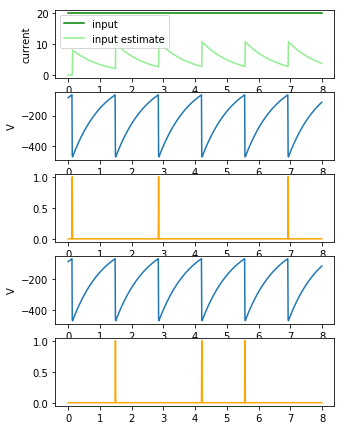

In [169]:
# total number of plots
plots = (N * 2) + 1
pl.subplots(plots, 1, figsize=(5,4))

# plot input and input estimate
pl.subplot(plots, 1, 1)
pl.plot(x, I_t, color='green',label='input')
pl.plot(x, Ihat_t, color='lightgreen',label='input estimate')
pl.ylabel('current')
pl.legend()

# plot voltage and spike times per neuron
counter = 2

for i in range(N):
    
    # plot voltages
    pl.subplot(plots, 1, counter)
    pl.plot(x, voltages[i],label='voltage')
    pl.ylabel('V')
    
    counter = counter + 1

    # plot spikes
    pl.subplot(plots, 1, counter)
    pl.plot(x, spikes[i],label='spikes',color='orange')
     
    counter = counter + 1

# adjust space between subplots
pl.subplots_adjust(top=1.5)